In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rutera = 'C:/Users/felip/OneDrive/Documentos/TUPED/3erAño/Visualizacion/data/titanic.csv'
df = pd.read_csv(rutera)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
#porcentaje de sobrevivientes
sobrev = df[df['Survived'] == 1]
sobrev = sobrev['Survived'].count()
total = df['Survived'].count()
porcentaje = round((sobrev/total)*100, 0)
print(f"{porcentaje}% de los pasajeros sobrevivieron")


39.0% de los pasajeros sobrevivieron


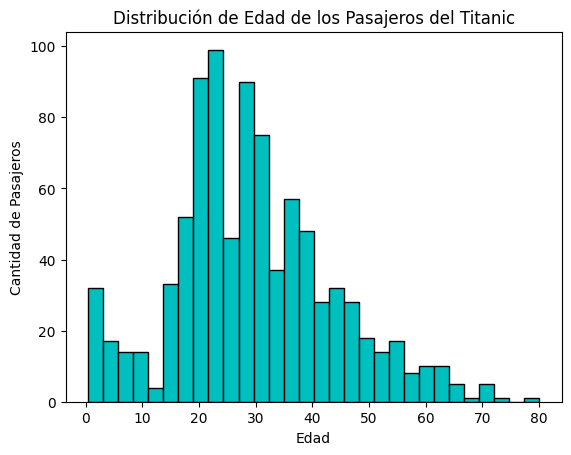

In [5]:
# Examina la distribución de edad de los pasajeros del Titanic
df['Age'].plot(kind='hist', bins=30, color='c', edgecolor='black')
plt.title('Distribución de Edad de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

Sex
male      573
female    314
Name: count, dtype: int64


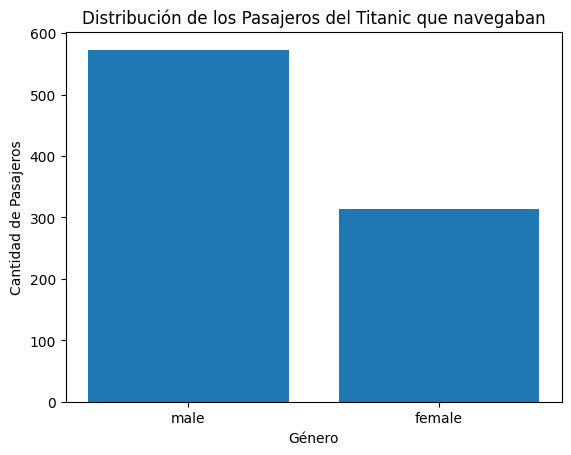

In [10]:
# Examina la distribución de genero de los pasajeros del Titanic

# Contar la cantidad de pasajeros por género
gender_counts = df['Sex'].value_counts()
print(gender_counts)

# Crear el gráfico de barras
plt.bar(gender_counts.index, gender_counts.values)

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de los Pasajeros del Titanic que navegaban')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')

# Mostrar el gráfico
plt.show()

Sex
female    233
male      109
Name: count, dtype: int64


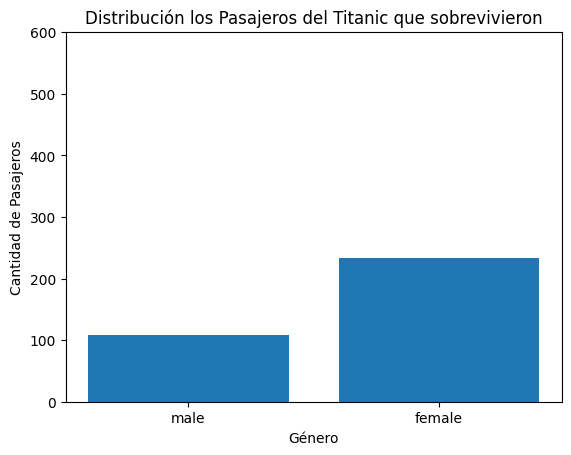

In [12]:
#escirbir un dataframe "sobrevivientes" que contenga las variables Suvirved y Sex
sobrevivientes = df[['Survived', 'Sex']]

#contar la cantidad de sobrevivientes por género
sobrevivientes = sobrevivientes[sobrevivientes['Survived']==1]
sobrevivientes = sobrevivientes.sort_values(by='Sex', ascending=False)

gender_counts_s = sobrevivientes['Sex'].value_counts()
print(gender_counts_s)

# # Crear el gráfico de barras
plt.bar(gender_counts_s.index, gender_counts_s.values)

# Configurar el título y etiquetas de los ejes
plt.title('Distribución los Pasajeros del Titanic que sobrevivieron')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')
plt.ylim(0,600)
#primero mostrar male despues female
plt.gca().invert_xaxis()
# Mostrar el gráfico
plt.show()

### ¿Hubo algún grupo demográfico que tuvo más probabilidades de sobrevivir?


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#REGRESION LOGISTICA
sorevivientes = df['Survived']
edades = df['Age']

#eliminar NaN
edades = edades.dropna()
sorevivientes = sorevivientes.dropna()

#junto las variables en un dataframe
dfReg = pd.DataFrame({'Age':edades, 'Survived':sorevivientes})


c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


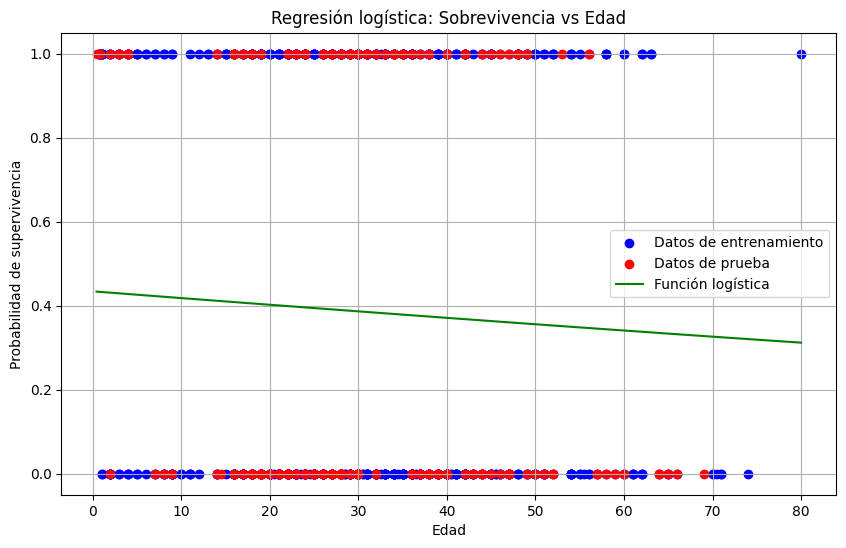

In [28]:
# Preparación de datos
X = dfReg[['Age']]
y = dfReg['Survived']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Generar valores de edad para graficar la función logística
age_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Calcular las probabilidades predichas por el modelo para estos valores de edad
probabilities = model.predict_proba(age_values)[:, 1]

# Graficar la función logística
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.plot(age_values, probabilities, color='green', label='Función logística')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de supervivencia')
plt.title('Regresión logística: Sobrevivencia vs Edad')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


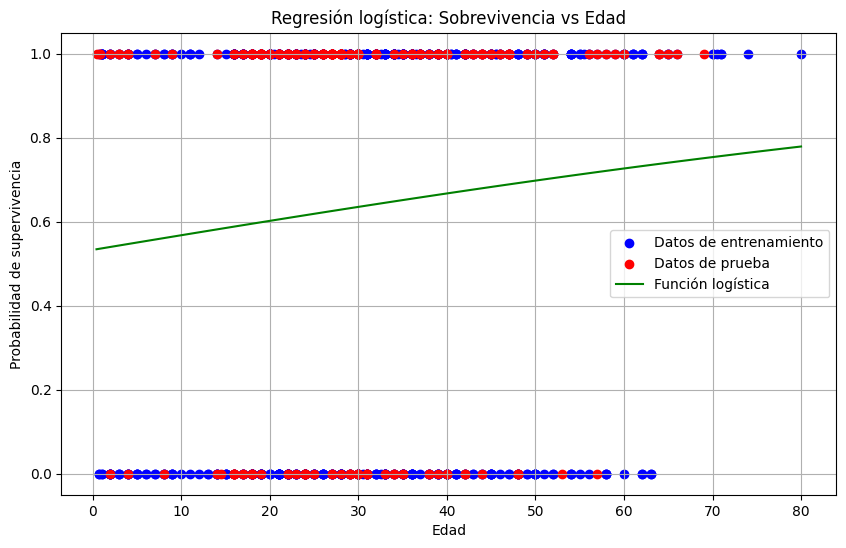

In [31]:
# Preparación de datos
X = df[['Age']]
y = df['Sex']
#transformar variable categorica a numerica
y = pd.get_dummies(y, drop_first=True)
y

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Generar valores de edad para graficar la función logística
age_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Calcular las probabilidades predichas por el modelo para estos valores de edad
probabilities = model.predict_proba(age_values)[:, 1]

# Graficar la función logística
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.plot(age_values, probabilities, color='green', label='Función logística')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de supervivencia')
plt.title('Regresión logística: Sobrevivencia vs Edad')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.702247191011236
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        53
        True       0.70      1.00      0.83       125

    accuracy                           0.70       178
   macro avg       0.35      0.50      0.41       178
weighted avg       0.49      0.70      0.58       178



c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

##### ¿Hubo alguna correlación entre la clase socioeconómica y las tasas de supervivencia? Podrías investigar si los pasajeros de primera clase tuvieron más probabilidades de sobrevivir que los de segunda o tercera clase.

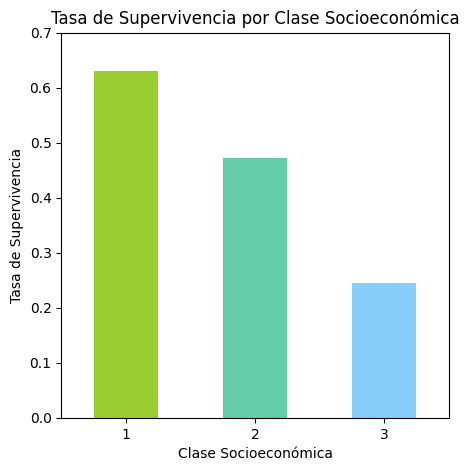

In [43]:
# Suponiendo que tienes un DataFrame llamado 'data' con las columnas 'Pclass' y 'Survived'

# Preparación de datos
df.dropna(subset=['Pclass', 'Survived'], inplace=True)  # Elimina registros con valores faltantes
df['Survived'] = df['Survived'].astype(int)  # Codifica la variable dependiente

# Análisis de las tasas de supervivencia por clase
survival_rates = df.groupby('Pclass')['Survived'].mean()

# Visualización de los resultados
plt.figure(figsize=(5, 5))
survival_rates.plot(kind='bar', color=['yellowgreen', 'mediumaquamarine', 'lightskyblue'])
#colorear cada barra

plt.xlabel('Clase Socioeconómica')
plt.ylabel('Tasa de Supervivencia')
plt.title('Tasa de Supervivencia por Clase Socioeconómica')
plt.xticks(rotation=0)
plt.ylim(0, 0.7)

# plt.grid(axis='y', alpha=0.7)
plt.show()


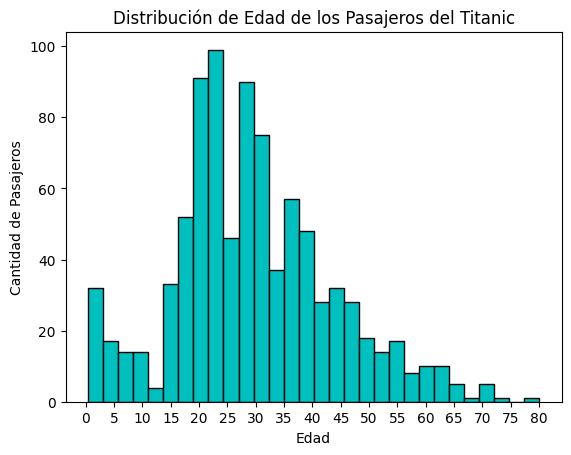

In [42]:
df['Age'].plot(kind='hist', bins=30, color='c', edgecolor='black')
#modificar el rango de edad cada 5 años
plt.xticks(np.arange(0, 85, step=5))
plt.title('Distribución de Edad de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.show()


In [ ]:
df.dropna(subset=['Age', 'Survived'], inplace=True)  # Elimina registros con valores faltantes
df['Survived'] = df['Survived'].astype(int)  # Codifica la variable dependiente

# Análisis de las tasas de supervivencia por clase
survival_rates = df.groupby('survived')['Age'].mean()

# Visualización de los resultados
plt.figure(figsize=(25, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Clase Socioeconómica')
plt.ylabel('Tasa de Supervivencia')
plt.title('Tasa de Supervivencia por Clase Socioeconómica')
plt.xticks(rotation=0)
plt.xticks(np.arange(0, 85, step=5))
#colorea las barras segun la tasa de supervivencia

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

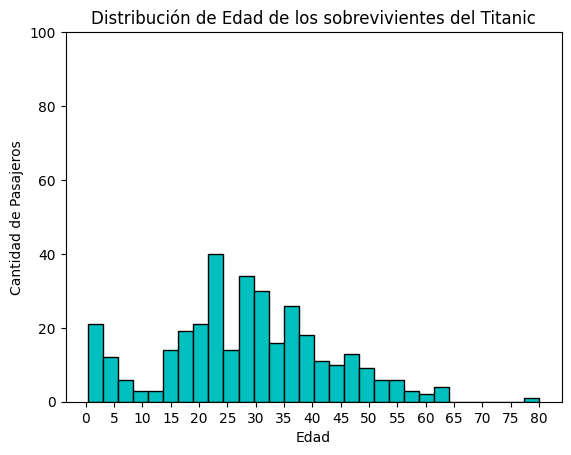

In [47]:
#graficar la distribucion de edades de los sobrevivientes
sobrev = df[df['Survived'] == 1]
sobrev['Age'].plot(kind='hist', bins=30, color='c', edgecolor='black')
plt.xticks(np.arange(0, 85, step=5))
plt.ylim(0, 100)
plt.title('Distribución de Edad de los sobrevivientes del Titanic')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pasajeros')
plt.show()


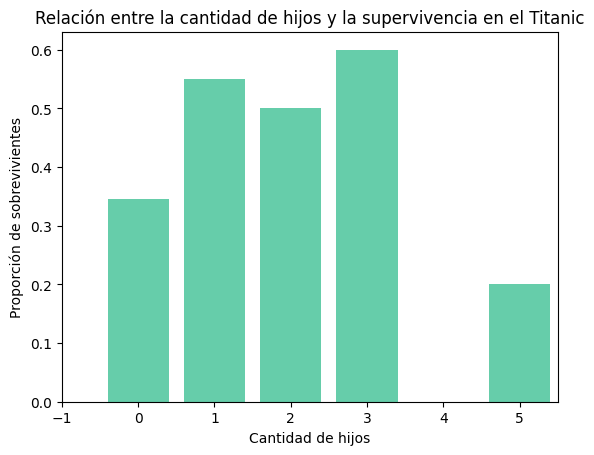

Valor de chi-cuadrado: 27.385799872005677
Valor p: 0.00012258610487405854


In [62]:
from scipy.stats import chi2_contingency

# Filtrar solo las columnas relevantes: 'Survived' (sobrevivió) y 'SibSp' (cantidad de hijos)
sobrev_hijos = df[['Survived', 'Parents/Children Aboard']]

# Agrupar por la cantidad de hijos y calcular la proporción de sobrevivientes en cada grupo
survival_by_sibsp = sobrev_hijos.groupby('Parents/Children Aboard')['Survived'].mean()

# Mostrar los resultados en un gráfico de barras
plt.bar(survival_by_sibsp.index, survival_by_sibsp.values, color='mediumaquamarine')
plt.xlim(-1, 5.5)
# plt.ylim(0, 2)
plt.xlabel('Cantidad de hijos')
plt.ylabel('Proporción de sobrevivientes')
plt.title('Relación entre la cantidad de hijos y la supervivencia en el Titanic')
plt.show()

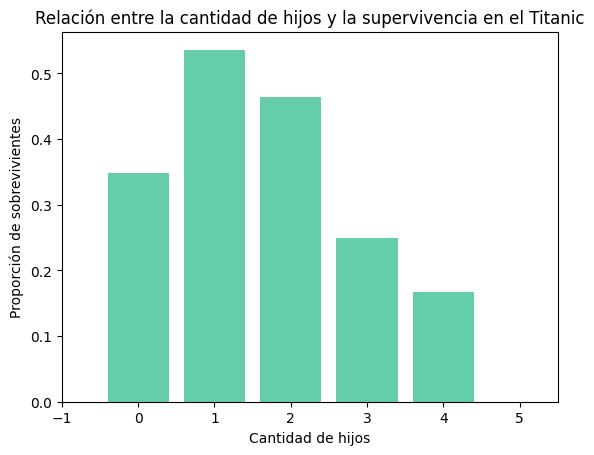

In [66]:
# Filtrar solo las columnas relevantes: 'Survived' (sobrevivió) y 'SibSp' (cantidad de hijos)
sobrev_hnos = df[['Survived', 'Siblings/Spouses Aboard']]

# Agrupar por la cantidad de hijos y calcular la proporción de sobrevivientes en cada grupo
survival_by_sibsp = sobrev_hnos.groupby('Siblings/Spouses Aboard')['Survived'].mean()

# Mostrar los resultados en un gráfico de barras
plt.bar(survival_by_sibsp.index, survival_by_sibsp.values, color='mediumaquamarine')
plt.xlim(-1, 5.5)
# plt.ylim(0, 2)
plt.xlabel('Cantidad de hijos')
plt.ylabel('Proporción de sobrevivientes')
plt.title('Relación entre la cantidad de hijos y la supervivencia en el Titanic')
plt.show()